Double mathematical pendulum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import solve_ivp

m1 = 1.0 
m2 = 1.0  
l1 = 1.0  
l2 = 1.0  
g = 9.81 

initial_state = [np.pi / 3, np.pi / 3, 0.0, 0.0]

t_span    = (0, 20) 
num_steps = 200000  
t_eval = np.linspace(t_span[0], t_span[1], num_steps)

def equations(t, state):
    alpha1, alpha2, alpha1_dot, alpha2_dot = state
    delta = alpha1 - alpha2

    denom1 = (m1 + m2) * l1 - m2 * l1 * np.cos(delta) ** 2
    denom2 = l2 * (m1 + m2) - m2 * l2 * np.cos(delta) ** 2

    alpha1_ddot = (
        -g * (m1 + m2) * np.sin(alpha1)
        - m2 * l2 * alpha2_dot ** 2 * np.sin(delta)
    ) / denom1

    alpha2_ddot = (
        l1 * (m1 + m2) * alpha1_dot ** 2 * np.sin(delta)
        - g * m2 * np.sin(alpha2)
    ) / denom2

    return [alpha1_dot, alpha2_dot, alpha1_ddot, alpha2_ddot]

solution = solve_ivp(equations, t_span, initial_state, t_eval=t_eval, method='RK45')


alpha1_array = solution.y[0]
alpha2_array = solution.y[1]

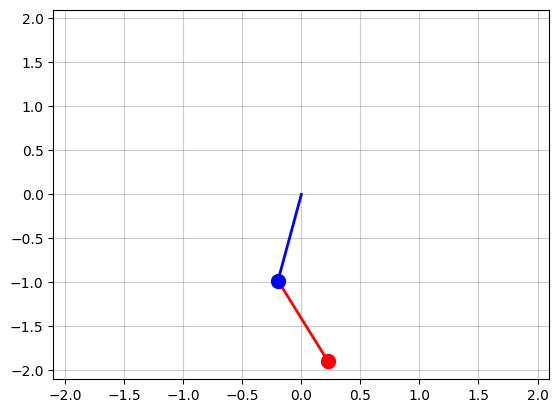

In [2]:

N = 400  # Take every Nth point for smoother animation
alpha1_animation = alpha1_array[::N]
alpha2_animation = alpha2_array[::N]
n_frames = len(alpha1_animation)

fig, ax = plt.subplots()
ax.set_xlim(-l1 - l2 - 0.1, l1 + l2 + 0.1)
ax.set_ylim(-l1 - l2 - 0.1, l1 + l2 + 0.1)
ax.grid(color='black', alpha=0.2)

line1, = ax.plot([], [], lw=2, color='blue')
line2, = ax.plot([], [], lw=2, color='red')
bob1, = ax.plot([], [], 'o', color='blue', markersize=10)
bob2, = ax.plot([], [], 'o', color='red', markersize=10)

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    bob1.set_data([], [])
    bob2.set_data([], [])
    return line1, line2, bob1, bob2

def update(i):
    x1 = l1 * np.sin(alpha1_animation[i])
    y1 = -l1 * np.cos(alpha1_animation[i])

    x2 = x1 + l2 * np.sin(alpha2_animation[i])
    y2 = y1 - l2 * np.cos(alpha2_animation[i])

    line1.set_data([0, x1], [0, y1])
    line2.set_data([x1, x2], [y1, y2])
    bob1.set_data(x1, y1)
    bob2.set_data(x2, y2)

    return line1, line2, bob1, bob2

ani = FuncAnimation(fig, update, frames=n_frames, init_func=init, blit=True, interval=20)

writer = PillowWriter(fps=24)
ani.save("double_pendulum.gif", writer=writer)

plt.show()
